notebook to get and clean de data of 24 heures newspaper about covid19 vaccination

In [ ]:
from helpers import *

In [5]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('   ', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\ufeff', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\u200b', '', text)
    
    return text
    

In [3]:
#JSON with all the information, but text is complicated to extract beacause there are several dictionaries and lists. 

_24_heures= pd.read_json("24heures.json")

In [207]:
#We take the links from the Json and we extract the HTML as we have done in the other newspapers

In [235]:
# list_links_24heures=[]
# for i in range(len(_24_heures)):    
#     p=pd.read_json(_24_heures[0][i])
#     link='https://www.24heures.ch'+p.content['meta']['url']
#     list_links_24heures.append(link)


In [236]:
# # Store the list in a document
# with open("list_links_24_heures.txt", 'w') as f:
#     for s in list_links_24heures:
#         f.write(str(s) + '\n')


In [237]:
with open("list_links_24_heures.txt", 'r') as f:
    list_links_24_heures = [line.rstrip('\n') for line in f]

In [244]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Driver [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45/chromedriver] found in cache


In [245]:
search_url='https://www.24heures.ch/'
email = ''
password = ''
driver.get(search_url) 

In [227]:
#14 days free premium 26/11/2021
def get_html_24heures(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/24_heures/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [214]:
# get_html_24heures(list_links_24heures)

In [238]:
len(list_links_24heures)

4178

In [248]:
# get_html_24heures(list_links_24heures[3500:])

In [247]:
# get_html_24heures(list_links_24heures[3783:])

In [246]:
get_html_24heures(list_links_24heures[4096:])

In [9]:
import os
list_articles_24heures=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/24_heures/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/24_heures/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1").text.strip()
    except: 
        title="error"
    try:
        author=soup.find(class_='ContentMetaInfo_author__3hPjj').text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find(class_='ContentHead_lead__1S033 link_regular__1eg4T link_externalicon-big__3ypDf link_externalicon__2CDAi').text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.time.attrs['datetime']
    except: 
        date="error"
    try:
        #interviews 
        if soup.find(class_="InterviewSegment_root__d3jJy ArticleContainer_content-width__pYdH3 link_focus__2-gJz link_externalicon__2CDAi"): 
            tf=soup.find_all(class_="InterviewSegment_root__d3jJy ArticleContainer_content-width__pYdH3 link_focus__2-gJz link_externalicon__2CDAi")
            for p in tf:
                list_text.append(p.get_text().strip())
            text=' '.join(list_text).strip()
        else: 
            #The most part of the contetn is this class, but there are some paragraphs with extra text in the tag
            #we use regex in order to say that the tags contain at least this part of the text
            regex = re.compile('ArticleParagraph_root__3J10I ArticleContainer_content-width__pYdH3 link_focus__2-gJz link_externalicon-big__3ypDf link_externalicon__2CDAi')
            tf=soup.find_all("p",{"class" : regex})
            for p in tf:
                list_text.append(p.get_text().strip())
            text=' '.join(list_text).strip()

    except: 
        text= "error"
    list_articles_24heures.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [10]:
articles_24_heures = pd.DataFrame.from_dict(list_articles_24heures)

articles_24_heures

,Title,Subheadline,Text,Authors,Date,Link
0,Premiers vaccinés – Le Royaume-Uni célèbre son...,Le service de santé publique a lancé mardi le ...,"Margaret Keenan, 91 ans la semaine prochaine, ...","Tristan de Bourbon, Londres",2020-12-08T17:03:01.000Z,https://www.24heures.ch/le-royaume-uni-celebre...
1,Venezuela - L’opposition veut la levée des san...,Le leader de l’opposition vénézuélienne Juan G...,«Le Venezuela a besoin d’un accord de salut na...,error,2021-05-12T01:08:53.000Z,https://www.24heures.ch/lopposition-veut-la-le...
2,Vaccin anti-Covid de Pfizer – Le patron de l’O...,Tedros Adhanom Ghebreyesus salue notamment la ...,Le directeur général de l’Organisation mondial...,error,2020-11-09T17:28:00.000Z,https://www.24heures.ch/le-patron-de-loms-salu...
3,"Gestion de la pandémie - Pour la presse, le Co...",Après les annonces d’Alain Berset de mercredi ...,Au lendemain des assouplissements annoncés par...,error,2021-04-15T05:48:37.000Z,https://www.24heures.ch/pour-la-presse-le-cons...
4,Votations fédérales – La nouvelle loi sur les ...,Le comité de soutien de la loi sur les épidémi...,La Suisse doit adapter aux dangers d'aujourd'h...,error,2013-08-08T12:41:36Z,https://www.24heures.ch/suisse/nouvelle-loi-ep...
...,...,...,...,...,...,...
4173,Infection à listeria – Un brie schwytzois caus...,Un fromage contaminé par listeria aurait tué d...,L’annonce a suscité l’émoi. Des fromages infes...,Hélène Krähenbühl,2020-08-27T17:19:09Z,https://www.24heures.ch/un-brie-schwytzois-cau...
4174,Coronavirus – Washington double son investisse...,Les États-Unis vont dépenser près d’un milliar...,Les États-Unis ont doublé leur investissement ...,error,2020-07-26T19:33:53Z,https://www.24heures.ch/washington-double-son-...
4175,L’euphorie et le trouble,François Modoux se demande quelle sorte de vie...,Les futures thérapies rajouteront-elles vraime...,François Modoux,2015-06-13T04:00:00Z,https://www.24heures.ch/signatures/reflexions/...
4176,Halte aux petits chiens mal vaccinés venus de ...,Le Canton et la Société protectrice des animau...,"Maltraités, mal vaccinés, porteurs de maladies...",Jérome Ducret,2016-07-01T18:16:04Z,https://www.24heures.ch/vaud-regions/halte-pet...


### CLEAN DATAFRAME

In [11]:
articles_24_heures['Newspaper']= '24 heures'
articles_24_heures['Country']= 'Switzerland'

In [12]:
# clean text
articles_24_heures['Text']=articles_24_heures['Text'].apply(preprocessor)
articles_24_heures['Title']=articles_24_heures['Title'].apply(preprocessor)

In [13]:
articles_24_heures['n_words'] = articles_24_heures.Text.apply(lambda x: len(str(x).split(' ')))

In [14]:
articles_24_heures=articles_24_heures.drop(articles_24_heures[articles_24_heures['Link']=="error"].index, inplace=False)
articles_24_heures=articles_24_heures.drop(articles_24_heures[articles_24_heures['n_words']<40].index, inplace=False)

In [15]:
#Take only the dates after 01/01/2020
articles_24_heures=articles_24_heures[articles_24_heures['Date']>'2020-01-01T17:35:16.000Z']

In [16]:
articles_24_heures=articles_24_heures.drop_duplicates()
articles_24_heures=articles_24_heures[articles_24_heures.Text.str.contains("vacc|Vacc")|articles_24_heures.Subheadline.str.contains("vacc|Vacc")|articles_24_heures.Title.str.contains("vacc|Vacc")]
articles_24_heures=articles_24_heures.drop(articles_24_heures[articles_24_heures['Date']=="error"].index, inplace=False)
articles_24_heures=articles_24_heures[~articles_24_heures.Date.isna()]

In [17]:
articles_24_heures

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
0,Premiers vaccinés – Le Royaume-Uni célèbre son...,Le service de santé publique a lancé mardi le ...,"Margaret Keenan, 91 ans la semaine prochaine, ...","Tristan de Bourbon, Londres",2020-12-08T17:03:01.000Z,https://www.24heures.ch/le-royaume-uni-celebre...,24 heures,Switzerland,508
1,Venezuela - L’opposition veut la levée des san...,Le leader de l’opposition vénézuélienne Juan G...,«Le Venezuela a besoin d’un accord de salut na...,error,2021-05-12T01:08:53.000Z,https://www.24heures.ch/lopposition-veut-la-le...,24 heures,Switzerland,432
2,Vaccin anti-Covid de Pfizer – Le patron de l’O...,Tedros Adhanom Ghebreyesus salue notamment la ...,Le directeur général de l’Organisation mondial...,error,2020-11-09T17:28:00.000Z,https://www.24heures.ch/le-patron-de-loms-salu...,24 heures,Switzerland,338
3,"Gestion de la pandémie - Pour la presse, le Co...",Après les annonces d’Alain Berset de mercredi ...,Au lendemain des assouplissements annoncés par...,error,2021-04-15T05:48:37.000Z,https://www.24heures.ch/pour-la-presse-le-cons...,24 heures,Switzerland,408
5,Banques – Raiffeisen ne perçoit pas d’indice d...,"Dans une interview au Blick, le directeur géné...",La Suisse ne connaît pas une vague de faillite...,error,2020-12-22T09:13:03.000Z,https://www.24heures.ch/raiffeisen-pas-dindice...,24 heures,Switzerland,198
...,...,...,...,...,...,...,...,...,...
4171,Prévention du Covid - La vaccination dès l’age...,L’institut Swissmedic a annoncé ce vendredi l’...,"Même efficacité, mêmes effets secondaires obse...",Caroline Zuercher,2021-06-04T17:46:00.000Z,https://www.24heures.ch/la-vaccination-des-lag...,24 heures,Switzerland,776
4172,États-Unis – Coronavirus: premier essai pour u...,Les autorités sanitaires américaines ont annon...,Le premier essai clinique pour tester un vacci...,error,2020-03-17T12:02:36Z,https://www.24heures.ch/monde/coronavirus-prem...,24 heures,Switzerland,592
4173,Infection à listeria – Un brie schwytzois caus...,Un fromage contaminé par listeria aurait tué d...,L’annonce a suscité l’émoi. Des fromages infes...,Hélène Krähenbühl,2020-08-27T17:19:09Z,https://www.24heures.ch/un-brie-schwytzois-cau...,24 heures,Switzerland,592
4174,Coronavirus – Washington double son investisse...,Les États-Unis vont dépenser près d’un milliar...,Les États-Unis ont doublé leur investissement ...,error,2020-07-26T19:33:53Z,https://www.24heures.ch/washington-double-son-...,24 heures,Switzerland,388


In [18]:
import datetime
from datetime import datetime

# DATE
for index,row in articles_24_heures.iterrows(): 
    try:
        articles_24_heures['Date'][index] =datetime.strptime(articles_24_heures['Date'][index], '%Y-%m-%dT%H:%M:%SZ').date()
    except: 
        try:
            articles_24_heures['Date'][index] =datetime.strptime(articles_24_heures['Date'][index], '%Y-%m-%dT%H:%M:%S.%fZ').date()
        except: 
            print(index)
            continue

/tmp/ipykernel_240857/2715296902.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_24_heures['Date'][index] =datetime.strptime(articles_24_heures['Date'][index], '%Y-%m-%dT%H:%M:%S.%fZ').date()
/tmp/ipykernel_240857/2715296902.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_24_heures['Date'][index] =datetime.strptime(articles_24_heures['Date'][index], '%Y-%m-%dT%H:%M:%SZ').date()


In [19]:
articles_24_heures.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
3315,Rien ne semble en mesure de freiner les Bourses,Bien que les facteurs géopolitiques inquiètent...,Même pas peur! À l’heure où débute le Forum éc...,Nicolas Pinguely,2020-01-21,https://www.24heures.ch/economie/semble-mesure...,24 heures,Switzerland,651
3140,Virus – Pas de mesures spécifiques à Cointrin ...,Aucune mesure n'a été mise en place aux aéropo...,Les aéroports suisses nont pas encore pris de ...,error,2020-01-22,https://www.24heures.ch/suisse/mesures-specifi...,24 heures,Switzerland,398
2889,Epidémie – Berset: «Nous sommes très bien prép...,Le conseiller fédéral Alain Berset a tenu à ra...,Alors que lOrganisation mondiale de la santé (...,error,2020-01-22,https://www.24heures.ch/monde/berset-tres-prep...,24 heures,Switzerland,465
943,"Asie – Face à lépidémie, la Chine en quarantaine",La Chine a confiné des millions d'habitants da...,Près dune dizaine de villes chinoises étaient ...,error,2020-01-24,https://www.24heures.ch/monde/face-epidemie-ch...,24 heures,Switzerland,739
1739,"Par crainte de la rage, l’État a piqué son chi...","Faute de papiers en règle, un canidé importé d...","Deux semaines après la mort de Mikle, Irina* e...",Julien Culet,2020-01-25,https://www.24heures.ch/lematindimanche/accuei...,24 heures,Switzerland,606
...,...,...,...,...,...,...,...,...,...
3343,Présidence de la Suisse en 2022 - Les défis qu...,Les relations écorchées avec l’UE et la crise ...,Ignazio Cassis présidera la Confédération l’an...,error,2021-11-21,https://www.24heures.ch/les-defis-qui-attenden...,24 heures,Switzerland,668
2633,"Immunité contre le Covid – Guéris ou vaccinés,...",On parle de plus en plus de la protection dont...,"D’un côté, il y a les vaccinés. De l’autre, le...",Caroline Zuercher,2021-11-21,https://www.24heures.ch/gueris-ou-vaccines-qui...,24 heures,Switzerland,875
205,"L’invité - Pourrait-on parler d’autre chose, j...",Jon Ferguson disserte sur les morts dans le tr...,Cela fait deux ans que nos pauvres esprits fra...,Jon Ferguson,2021-11-22,https://www.24heures.ch/pourrait-on-parler-dau...,24 heures,Switzerland,509
3672,Recrudescence des infections – Les cantons env...,Des discussions sur un durcissement des mesure...,Le président de la Conférence des directeurs c...,error,2021-11-22,https://www.24heures.ch/les-cantons-envisagent...,24 heures,Switzerland,547


In [20]:
#28 articles without headline
articles_24_heures=articles_24_heures.drop(articles_24_heures[articles_24_heures['Title']=="error"].index)

In [24]:
articles_24_heures.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_24_heures_27_11_2021_premium.csv', index = False)

In [15]:
************************************************

In [25]:
df= pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_24_heures_27_11_2021_premium.csv')

In [26]:
df[df['Title']=="error"]

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words


In [ ]:
df.sort_values('Date')

In [4]:
df.Link[1268]

'https://www.24heures.ch/les-cantons-envisagent-de-nouvelles-restrictions-262993520557'

# NER

In [3]:
df_ner= ner(df.Text,"fr_core_news_sm")

In [4]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [5]:
#Eliminate wrong entitites
list_wrong_entities=['l’', 'n’','L’','c’','C’','l’','–','jusqu’','j’','Retrouvez']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

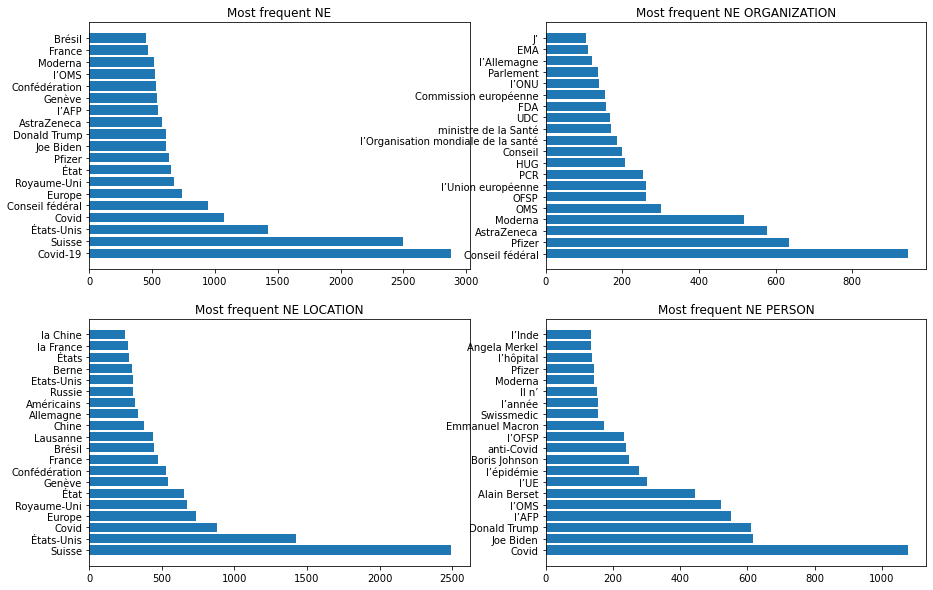

In [6]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')